In [1]:
# For data handling
import pandas as pd
import numpy as np

# For image processing
import os
import cv2
from glob import glob
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning / deep learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

print("Libarary successfully installed")


Libarary successfully installed


In [2]:
skin_df = pd.read_csv("HAM10000\HAM10000_metadata.csv")
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [3]:
skin_df.tail()

,lesion_id,image_id,dx,dx_type,age,sex,localization
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face
10014,HAM_0003521,ISIC_0032258,mel,histo,70.0,female,back


In [4]:
skin_df.shape

(10015, 7)

In [5]:
skin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [6]:
# Check for missing values
skin_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [7]:
skin_df.isnull().sum()/skin_df.shape[0]*100   #percentage of misiing value

lesion_id       0.000000
image_id        0.000000
dx              0.000000
dx_type         0.000000
age             0.569146
sex             0.000000
localization    0.000000
dtype: float64

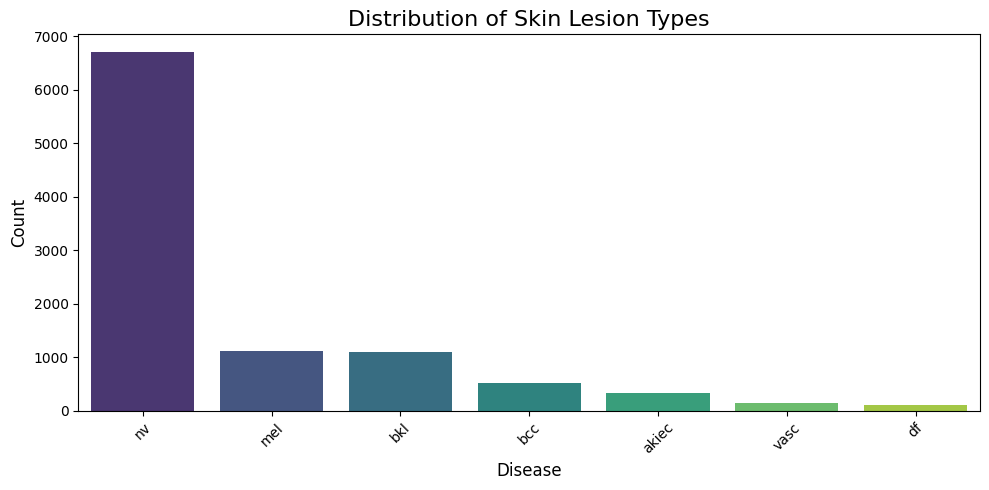

In [8]:
 # Exploratory Data Analysis (EDA)

plt.figure(figsize=(10, 5))  # Set figure size
sns.countplot(x='dx', data=skin_df, order=skin_df['dx'].value_counts().index, palette="viridis")  # Ordered by frequency

# Add labels
plt.xlabel("Disease", size=12)  
plt.ylabel("Count", size=12)  

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add title
plt.title("Distribution of Skin Lesion Types", size=16)

# Adjust layout to prevent cutoff
plt.tight_layout()  

# Show plot
plt.show()



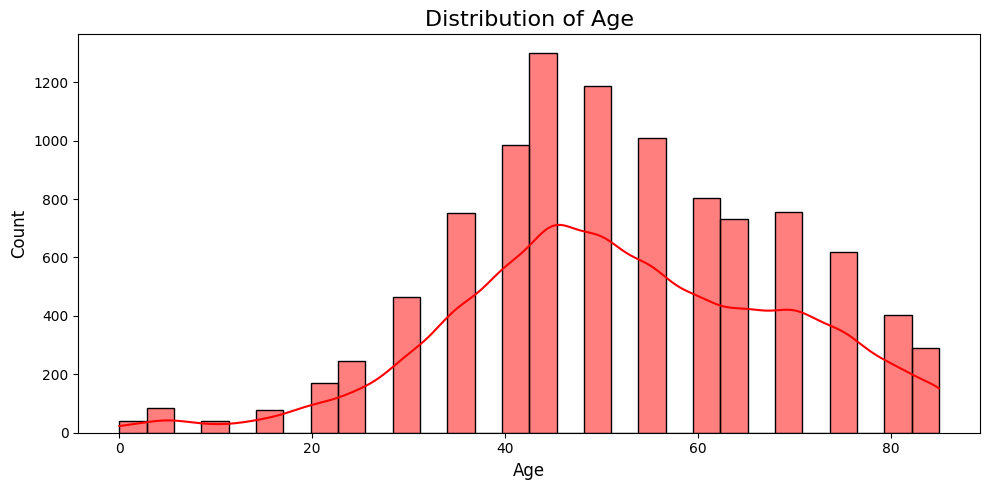

In [9]:

# Set figure size
plt.figure(figsize=(10, 5))

# Plot count of age distribution
sns.histplot(skin_df['age'], bins=30, kde=True, color='RED')  # Histogram for age distribution

# Labels and title
plt.xlabel("Age", size=12)
plt.ylabel("Count", size=12)
plt.title("Distribution of Age", size=16)
plt.tight_layout()
plt.show()

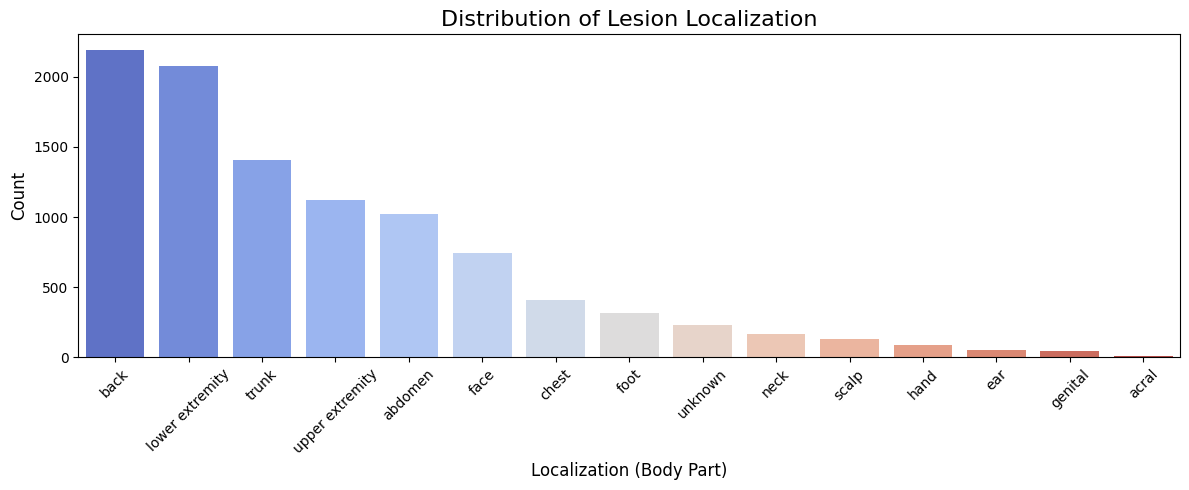

In [10]:
plt.figure(figsize=(12, 5))

# Countplot for localization (ordered by frequency)
sns.countplot(x='localization', data=skin_df, order=skin_df['localization'].value_counts().index, palette="coolwarm")

# Labels and title
plt.xlabel("Localization (Body Part)", size=12)
plt.ylabel("Count", size=12)
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.title("Distribution of Lesion Localization", size=16)
plt.tight_layout()
plt.show()

In [11]:
# 1descriptive  stastices
skin_df.describe().T  # Shows mean, std, min, max values

,count,mean,std,min,25%,50%,75%,max
age,9958.0,51.863828,16.968614,0.0,40.0,50.0,65.0,85.0


In [12]:
 skin_df.describe(include="object")  # Shows counts, unique values, etc.

,lesion_id,image_id,dx,dx_type,sex,localization
count,10015,10015,10015,10015,10015,10015
unique,7470,10015,7,4,3,15
top,HAM_0003789,ISIC_0027419,nv,histo,male,back
freq,6,1,6705,5340,5406,2192


In [13]:
# Example: Fill missing 'age' with mean age
skin_df['age'] = skin_df['age'].fillna(skin_df['age'].mean())


In [14]:
print(skin_df['age'].isnull().sum())
# Output: 0

0


In [15]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(skin_df['dx'])
skin_df['label']=labelEncoder.transform(skin_df['dx'])

In [16]:
diagnoses = labelEncoder.classes_
encoded_labels = labelEncoder.transform(diagnoses)
diagnosis_mapping = dict(zip(encoded_labels, diagnoses))
for label, diagnosis in diagnosis_mapping.items():
    print(f"Label {label} represents diagnosis: {diagnosis}")


Label 0 represents diagnosis: akiec
Label 1 represents diagnosis: bcc
Label 2 represents diagnosis: bkl
Label 3 represents diagnosis: df
Label 4 represents diagnosis: mel
Label 5 represents diagnosis: nv
Label 6 represents diagnosis: vasc


In [17]:
import os
import pandas as pd

# Paths to image folders
folder1_path = 'HAM10000/HAM10000_images_part_1'
folder2_path = 'HAM10000/HAM10000_images_part_2'



# Create mapping between image_id and full image path
image_mapping = {}

# Iterate over images in folder 1
for filename in os.listdir(folder1_path):
    image_id = filename.split('.')[0]
    image_mapping[image_id] = os.path.join(folder1_path, filename)

# Iterate over images in folder 2
for filename in os.listdir(folder2_path):
    image_id = filename.split('.')[0]
    image_mapping[image_id] = os.path.join(folder2_path, filename)

# Link image paths with metadata
skin_df['image_path'] = skin_df['image_id'].map(image_mapping)

# Show first 5 rows
skin_df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,label,image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2,HAM10000/HAM10000_images_part_2\ISIC_0031633.jpg


In [18]:
# Mapping from dx (short codes) to full lesion names
lesion_type_dict = {
    'akiec': 'Actinic keratoses and intraepithelial carcinoma',
    'bcc': 'Basal cell carcinoma',
    'bkl': 'Benign keratosis-like lesions',
    'df': 'Dermatofibroma',
    'mel': 'Melanoma',
    'nv': 'Melanocytic nevi',
    'vasc': 'Vascular lesions'
}

# Create new column with full lesion names
skin_df['lesion_type'] = skin_df['dx'].map(lesion_type_dict)

# Show updated DataFrame
skin_df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,label,image_path,lesion_type
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0027419.jpg,Benign keratosis-like lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0025030.jpg,Benign keratosis-like lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0026769.jpg,Benign keratosis-like lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0025661.jpg,Benign keratosis-like lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2,HAM10000/HAM10000_images_part_2\ISIC_0031633.jpg,Benign keratosis-like lesions


In [19]:
import cv2
import numpy as np

# Function for reading and resizing the images
def read_and_resize_image(image_path, target_size=(64, 64)):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, target_size)
    # Convert BGR to RGB format
    rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    return rgb_image

# Appliying row wise
skin_df['image_array'] = skin_df['image_path'].apply(lambda x: read_and_resize_image(x))

skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,image_path,lesion_type,image_array
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0027419.jpg,Benign keratosis-like lesions,"[[[193, 156, 197], [188, 152, 194], [194, 145,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0025030.jpg,Benign keratosis-like lesions,"[[[21, 12, 25], [23, 14, 27], [36, 25, 42], [6..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0026769.jpg,Benign keratosis-like lesions,"[[[185, 129, 138], [191, 134, 148], [199, 147,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0025661.jpg,Benign keratosis-like lesions,"[[[23, 10, 17], [34, 20, 30], [63, 35, 47], [9..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2,HAM10000/HAM10000_images_part_2\ISIC_0031633.jpg,Benign keratosis-like lesions,"[[[139, 94, 117], [158, 114, 139], [179, 134, ..."


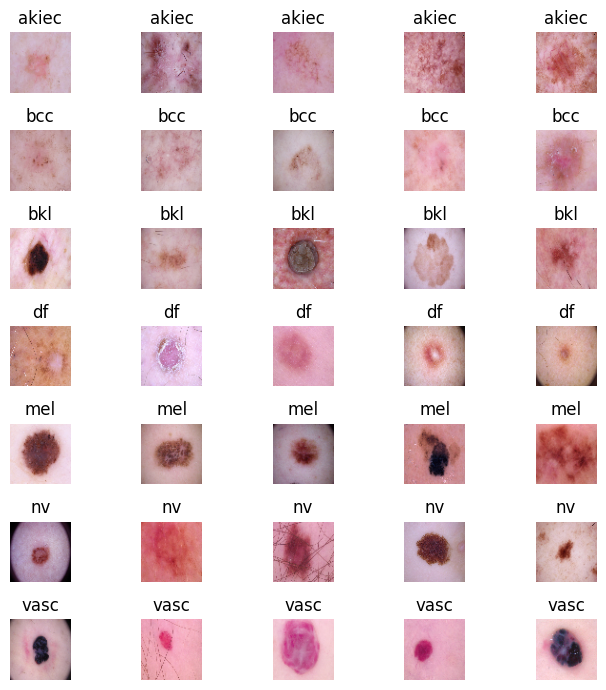

In [20]:
import matplotlib.pyplot as plt

# Set the number of samples to display for each diagnosis type
n_samples = 5

# Plotting
fig, maxs = plt.subplots(7, n_samples, figsize=(7, 7))

# Iterate over each diagnosis type
for n_axs, (type_name, type_rows) in zip(maxs, skin_df.sort_values(['dx']).groupby('dx')):
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image_array'])
        c_ax.axis('off')
        c_ax.set_title(type_name)

plt.tight_layout()
plt.show()

In [21]:
#split dataset according to traing and testing
from tensorflow.keras.utils import to_categorical
X = np.asarray(skin_df['image_array'].tolist())
X = X/255. #max pixel
y = skin_df['label']
y_cat = to_categorical(y, num_classes= 7)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8012, 64, 64, 3)
(2003, 64, 64, 3)
(8012, 7)
(2003, 7)


In [24]:
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Count class distribution
label_counts = Counter(y)
print("Original class distribution:", label_counts)

# Separate images and labels by class
class_indices = {i: np.where(y == i)[0] for i in range(len(diagnoses))}

# Target number of samples per class (max count)
target_count = max(label_counts.values())

# Define augmentation generator
augmenter = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)

X_augmented = []
y_augmented = []

for class_label, indices in class_indices.items():
    current_count = len(indices)
    images = X[indices]
    labels = y_cat[indices]

    # Add original images
    X_augmented.extend(images)
    y_augmented.extend(labels)

    if current_count < target_count:
        # Calculate how many more samples we need
        needed = target_count - current_count

        # Generate augmented images
        aug_iter = augmenter.flow(images, labels, batch_size=1)
        for _ in range(needed):
            img, lbl = next(aug_iter)
            X_augmented.append(img[0])
            y_augmented.append(lbl[0])

X_balanced = np.array(X_augmented)
y_balanced = np.array(y_augmented)

print("Balanced dataset shape:", X_balanced.shape, y_balanced.shape)

# Split again
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

print("Balanced training data:", X_train_bal.shape, y_train_bal.shape)
print("Balanced training data:", X_test_bal.shape, y_test_bal.shape)


Original class distribution: Counter({5: 6705, 4: 1113, 2: 1099, 1: 514, 0: 327, 6: 142, 3: 115})
Balanced dataset shape: (46935, 64, 64, 3) (46935, 7)
Balanced training data: (37548, 64, 64, 3) (37548, 7)
Balanced training data: (9387, 64, 64, 3) (9387, 7)


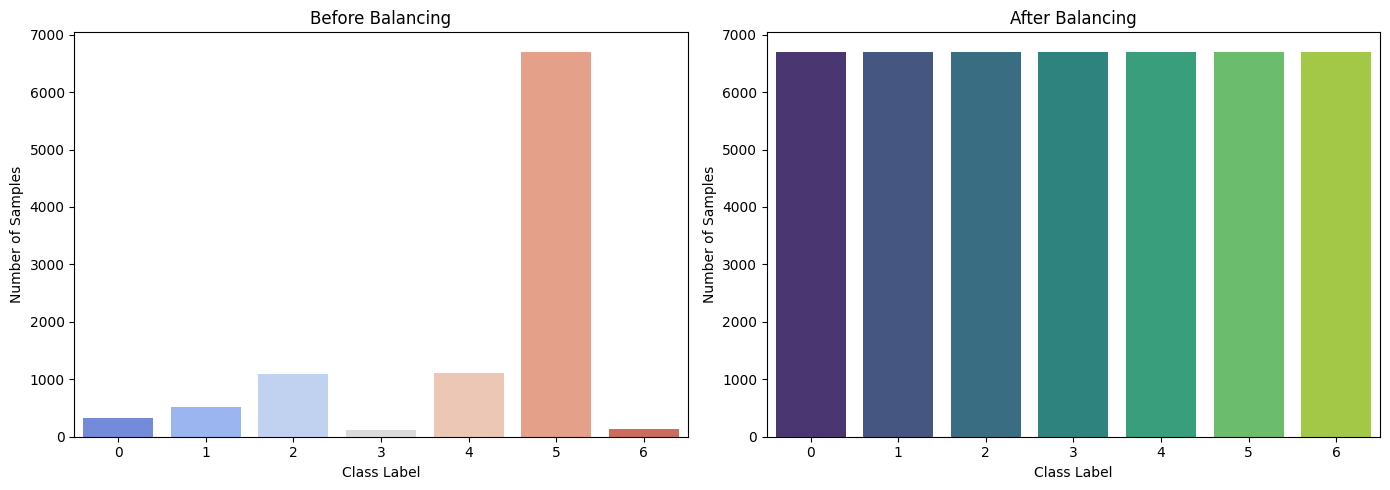

In [25]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Count original and balanced class samples
original_counts = dict(Counter(y))
balanced_counts = dict(Counter(np.argmax(y_balanced, axis=1)))

# Plot before and after
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x=list(original_counts.keys()), y=list(original_counts.values()), ax=axes[0], palette="coolwarm")
axes[0].set_title("Before Balancing")
axes[0].set_xlabel("Class Label")
axes[0].set_ylabel("Number of Samples")

sns.barplot(x=list(balanced_counts.keys()), y=list(balanced_counts.values()), ax=axes[1], palette="viridis")
axes[1].set_title("After Balancing")
axes[1].set_xlabel("Class Label")
axes[1].set_ylabel("Number of Samples")

plt.tight_layout()
plt.show()


In [27]:
#cnn model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [29]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.4),
    
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Compile model
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                        

In [30]:
# Callbacks
callbacks = [
    EarlyStopping(patience=6, restore_best_weights=True, monitor='val_loss'),
    ReduceLROnPlateau(patience=3, factor=0.5, monitor='val_loss', verbose=1)
]

In [31]:
# Model training
history = model.fit(
    X_train_bal, y_train_bal,
    validation_data=(X_test_bal, y_test_bal),
    epochs=40,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/40
1174/1174 [==============================] - 13s 8ms/step - loss: 1.2177 - accuracy: 0.5346 - val_loss: 0.9338 - val_accuracy: 0.6302 - lr: 5.0000e-04
Epoch 2/40
1174/1174 [==============================] - 9s 7ms/step - loss: 0.8940 - accuracy: 0.6671 - val_loss: 2.3334 - val_accuracy: 0.3830 - lr: 5.0000e-04
Epoch 3/40
1174/1174 [==============================] - 8s 7ms/step - loss: 0.7564 - accuracy: 0.7161 - val_loss: 1.4578 - val_accuracy: 0.5445 - lr: 5.0000e-04
Epoch 4/40
1171/1174 [============================>.] - ETA: 0s - loss: 0.6764 - accuracy: 0.7458
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1174/1174 [==============================] - 9s 7ms/step - loss: 0.6765 - accuracy: 0.7457 - val_loss: 3.0203 - val_accuracy: 0.3480 - lr: 5.0000e-04
Epoch 5/40
1174/1174 [==============================] - 8s 7ms/step - loss: 0.5673 - accuracy: 0.7879 - val_loss: 0.5404 - val_accuracy: 0.7947 - lr: 2.5000e-04
Epoch 6/40
1174/1174 [=========

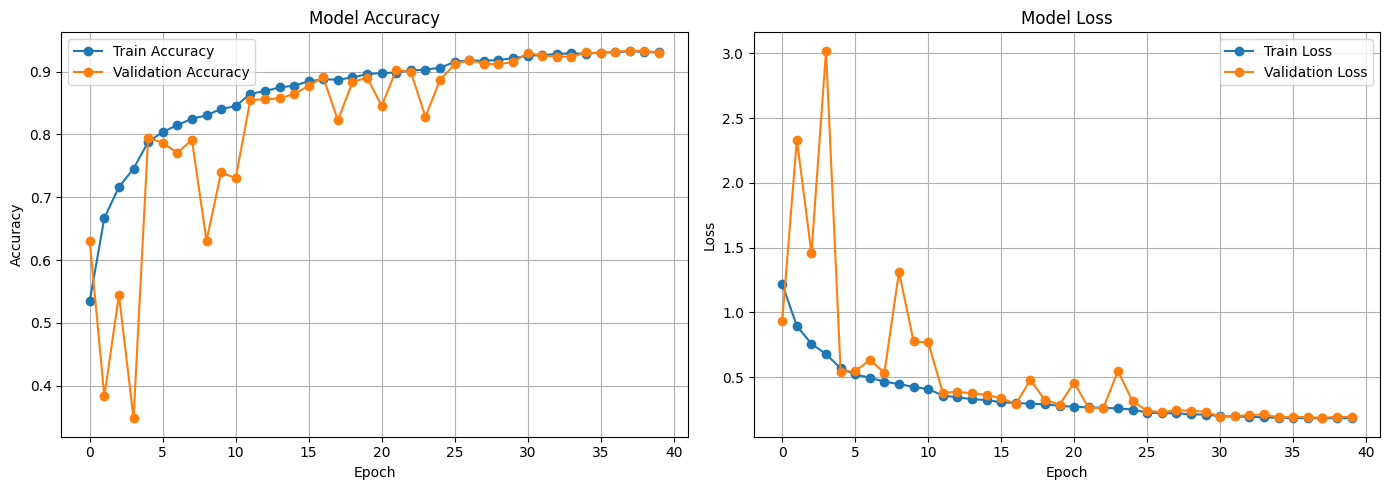

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Predict class probabilities
y_pred_probs = model.predict(X_test_bal)

# Get predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true class labels
y_true = np.argmax(y_test_bal, axis=1)



294/294 [==============================] - 1s 2ms/step


In [34]:
# Accuracy
test_accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification Report
report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n")
print(report)


Test Accuracy: 0.9303
Classification Report:

              precision    recall  f1-score   support

           0     0.8929    0.9941    0.9408      1359
           1     0.9707    0.9677    0.9692      1301
           2     0.8444    0.8419    0.8431      1328
           3     0.9876    1.0000    0.9937      1350
           4     0.9188    0.7956    0.8527      1394
           5     0.9024    0.9165    0.9094      1281
           6     0.9956    0.9985    0.9971      1374

    accuracy                         0.9303      9387
   macro avg     0.9303    0.9306    0.9294      9387
weighted avg     0.9306    0.9303    0.9294      9387



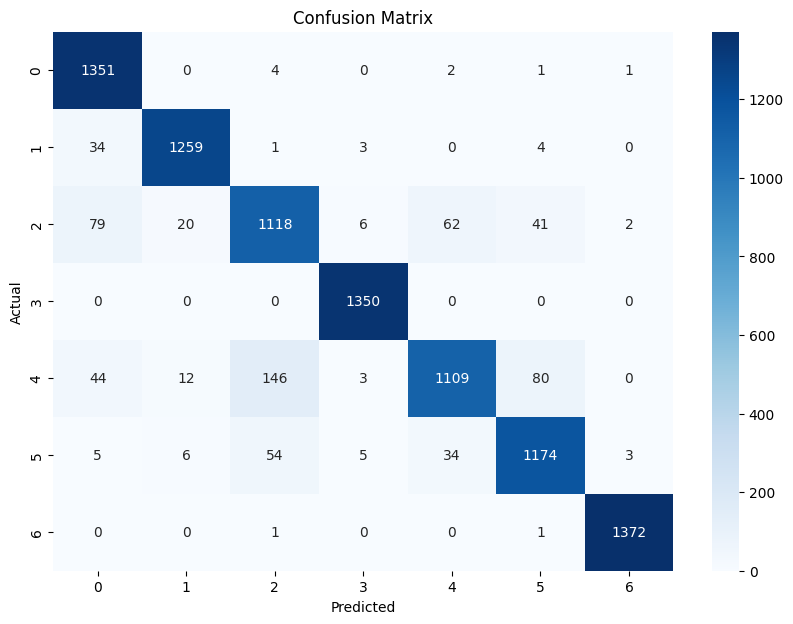

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


1/1 [==============================] - 0s 61ms/step


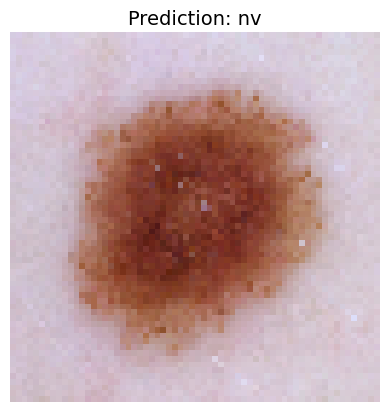

In [36]:

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


class_names = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

img_path =r"C:\Users\Admin\Desktop\Skin_lesion\HAM10000\HAM10000_images_part_1\ISIC_0024317.jpg"

img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # normalize
img_array = np.expand_dims(img_array, axis=0)  

prediction = model.predict(img_array)
pred_class_index = np.argmax(prediction)
pred_class_label = class_names[pred_class_index]
plt.imshow(img)
plt.title(f'Prediction: {pred_class_label}', fontsize=14)
plt.axis('off')
plt.show()


In [37]:
model.save("CNN.h5")

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, log_loss
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import time

In [27]:
X_flat = X_balanced.reshape(len(X_balanced), -1)  # (num_samples, 64*64*3)
print("Flattened shape:", X_flat.shape)

Flattened shape: (46935, 12288)


In [28]:
pca = PCA(n_components=100, random_state=42)
X_pca = pca.fit_transform(X_flat)

In [29]:
X_pca.shape

(46935, 100)

In [30]:
X_train_svm, X_val_svm, y_train_svm, y_val_svm = train_test_split(X_pca, y_balanced, test_size=0.2, stratify=y_balanced.argmax(axis=1), random_state=42)


In [31]:
print("Training SVM...")

start_time = time.time()

svm_model = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train_svm, y_train_svm.argmax(axis=1))

print(f"SVM training complete in {round(time.time() - start_time, 2)} seconds.")


Training SVM...
SVM training complete in 227.47 seconds.


In [32]:
y_pred = svm_model.predict(X_val_svm)
y_prob = svm_model.predict_proba(X_val_svm)

val_acc = accuracy_score(y_val_svm.argmax(axis=1), y_pred)
val_loss = log_loss(y_val_svm, y_prob)

print(f"\n✅ Validation Accuracy: {val_acc*100:.2f}%")
print(f"✅ Validation Log Loss: {val_loss:.4f}\n")

print("Classification Report:")
print(classification_report(y_val_svm.argmax(axis=1), y_pred, target_names=diagnoses))


✅ Validation Accuracy: 79.90%
✅ Validation Log Loss: 0.5593

Classification Report:
              precision    recall  f1-score   support

       akiec       0.76      0.84      0.80      1341
         bcc       0.76      0.77      0.77      1341
         bkl       0.68      0.63      0.65      1341
          df       0.90      0.92      0.91      1341
         mel       0.70      0.68      0.69      1341
          nv       0.82      0.77      0.79      1341
        vasc       0.96      0.98      0.97      1341

    accuracy                           0.80      9387
   macro avg       0.80      0.80      0.80      9387
weighted avg       0.80      0.80      0.80      9387

